In [2]:
import pandas as pd
import numpy as np
import os

#this modlue is used for visual represenation of loading the content.. 
from tqdm.notebook import tqdm



In [3]:
#get to know what directories are their in the folders.

path = 'C:/Users/raghu/Desktop/Final sem project/data set 2/UTKFace'
dir_list = os.listdir(path) 
print(dir_list)


['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg', '100_1_0_20170112213001988.jpg.chip.jpg', '100_1_0_20170112213303693.jpg.chip.jpg', '100_1_0_20170112215032192.jpg.chip.jpg', '100_1_0_20170117195420803.jpg.chip.jpg', '100_1_0_20170119212053665.jpg.chip.jpg', '100_1_2_20170105174847679.jpg.chip.jpg', '100_1_2_20170112213615815.jpg.chip.jpg', '100_1_2_20170112222336458.jpg.chip.jpg', '101_0_0_20170112213500903.jpg.chip.jpg', '101_1_2_20170105174739309.jpg.chip.jpg', '103_0_2_20170112213001988.jpg.chip.jpg', '105_0_0_20170112213001988.jpg.chip.jpg', '105_1_0_20170112213001988.jpg.chip.jpg', '105_1_0_20170112213021902.jpg.chip.jpg', '105_1_0_20170112213507183.jpg.chip.jpg', '105_1_1_20170112213303693.jpg.chip.jpg', '10_0_0_20161220222308131.jpg.chip.jpg', '10_0_0_20170103200329407.jpg.chip.jpg', '10_0_0_20170103200522151.jpg.chip.jpg', '10_0_0_20170103233459275.jpg.chip.jpg', '10_0_0_20170104013211746.jpg.chip.jp

In [4]:
#from the data set we have 3 lables 
#Age Gender ethnicity
# so i am segreating them accordingly..

images_path, age, gender = [],[],[]

for filename in tqdm (os.listdir(path)):
    images_path.append(os.path.join(path, filename))
    temp = filename.split('_')
    #print(temp[0])
    age.append(int(temp[0]))
    gender.append(int(temp[1]))


  0%|          | 0/23708 [00:00<?, ?it/s]

In [5]:
#loading the data into data frame.

data = pd.DataFrame()
data['images_path'],data['age'],data['gender'] = images_path, age, gender

In [6]:
#cross verifying if the data is loaded correctly or not
#note in gender column '0' refers to male and '1' refers to female.
data.head()

images_path  age  gender
0  C:/Users/raghu/Desktop/Final sem project/data ...  100       0
1  C:/Users/raghu/Desktop/Final sem project/data ...  100       0
2  C:/Users/raghu/Desktop/Final sem project/data ...  100       1
3  C:/Users/raghu/Desktop/Final sem project/data ...  100       1
4  C:/Users/raghu/Desktop/Final sem project/data ...  100       1

In [6]:
#shape of the data

shape = data.shape

print(shape)

(23708, 3)


In [7]:
#looking what kind of data types we have in our data frame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   images_path  23708 non-null  object
 1   age          23708 non-null  int64 
 2   gender       23708 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 555.8+ KB


In [8]:
#looking for null data if we have anything.. if yes, we can use mean methode to fill the values.

data.isnull().sum()

images_path    0
age            0
gender         0
dtype: int64

In [9]:
#describing the data 

data.describe()

age        gender
count  23708.000000  23708.000000
mean      33.303484      0.477349
std       19.886112      0.499497
min        1.000000      0.000000
25%       23.000000      0.000000
50%       29.000000      0.000000
75%       45.000000      1.000000
max      116.000000      1.000000

In [10]:
#cross verification
print(data['age'][1000])

16


In [11]:
#cross verification if data path is correct or not.
print(data['images_path'][1])

C:/Users/raghu/Desktop/Final sem project/data set 2/UTKFace\100_0_0_20170112215240346.jpg.chip.jpg


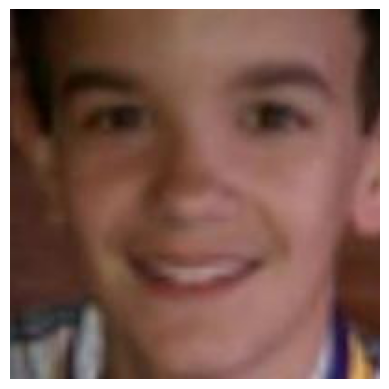

In [12]:
#printing the image
# here i am using PLI for printing the images.

from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(data['images_path'][23])
plt.axis('off')
plt.imshow(img);

Text(0.5, 1.0, 'Age distribution')

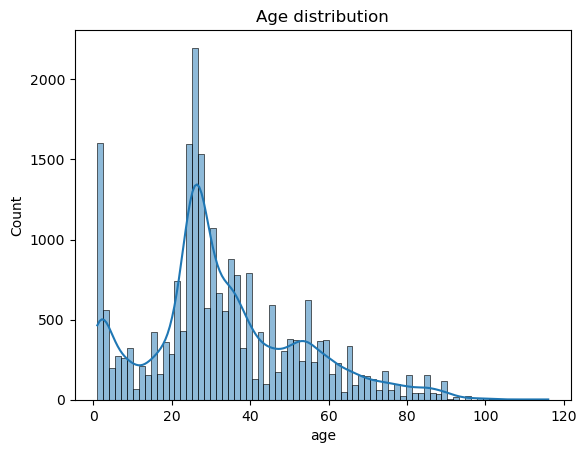

In [13]:
import seaborn as sns

#looking for the age data distribution

sns.histplot(data['age'],kde=True)
plt.title('Age distribution')


Text(0.5, 1.0, 'genders counts')

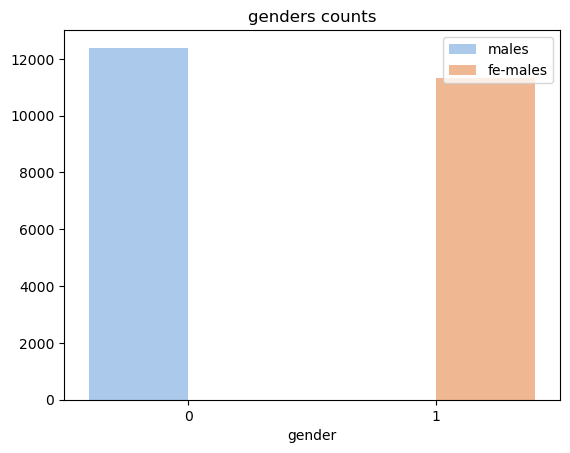

In [14]:
#Plotting the gender data
#note in gender column '0' refers to male and '1' refers to female.

gender_counts = data['gender'].value_counts()
G_lables = ['males','fe-males']
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel', hue=G_lables )
plt.title('genders counts')


In [15]:
#gettting the counts for clear understanding
print(gender_counts)

gender
0    12391
1    11317
Name: count, dtype: int64


In [16]:
#looking indetail for more understanding of the data..

#her my bins are defined based on the real world considerations. 

bins = [0, 5, 17, 40, 64, 120]  
labels = ['Toddlers/Preschoolers', 'Children', 'Young Adults', 'Middle Age', 'Seniors']

#marking the data according to lables and bins
data['age_groups'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

#now calculating the counts and storing in list
frequency_table = data['age_groups'].value_counts().sort_index().rename_axis('Age Categories').reset_index(name='Count')

# Display the frequency table
print(frequency_table)

          Age Categories  Count
0  Toddlers/Preschoolers   2167
1               Children   1908
2           Young Adults  12399
3             Middle Age   5226
4                Seniors   2008


Text(0.5, 1.0, 'Distribution of Age Categories')

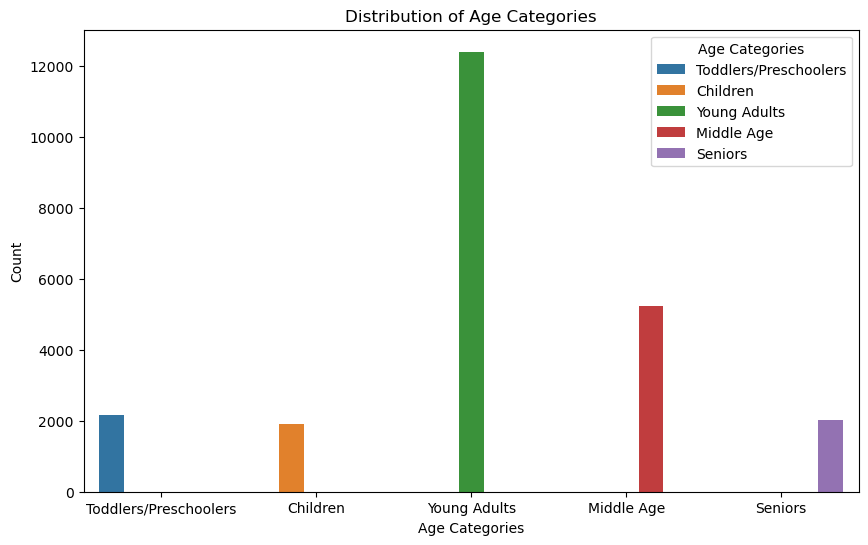

In [18]:
#data.head()
#plotting the values for clear understanding
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Age Categories', y='Count', data=frequency_table, hue='Age Categories')
plt.title('Distribution of Age Categories')


In [19]:
data.head(10)

images_path  age  gender age_groups
0  C:/Users/raghu/Desktop/Final sem project/data ...  100       0    Seniors
1  C:/Users/raghu/Desktop/Final sem project/data ...  100       0    Seniors
2  C:/Users/raghu/Desktop/Final sem project/data ...  100       1    Seniors
3  C:/Users/raghu/Desktop/Final sem project/data ...  100       1    Seniors
4  C:/Users/raghu/Desktop/Final sem project/data ...  100       1    Seniors
5  C:/Users/raghu/Desktop/Final sem project/data ...  100       1    Seniors
6  C:/Users/raghu/Desktop/Final sem project/data ...  100       1    Seniors
7  C:/Users/raghu/Desktop/Final sem project/data ...  100       1    Seniors
8  C:/Users/raghu/Desktop/Final sem project/data ...  100       1    Seniors
9  C:/Users/raghu/Desktop/Final sem project/data ...  100       1    Seniors

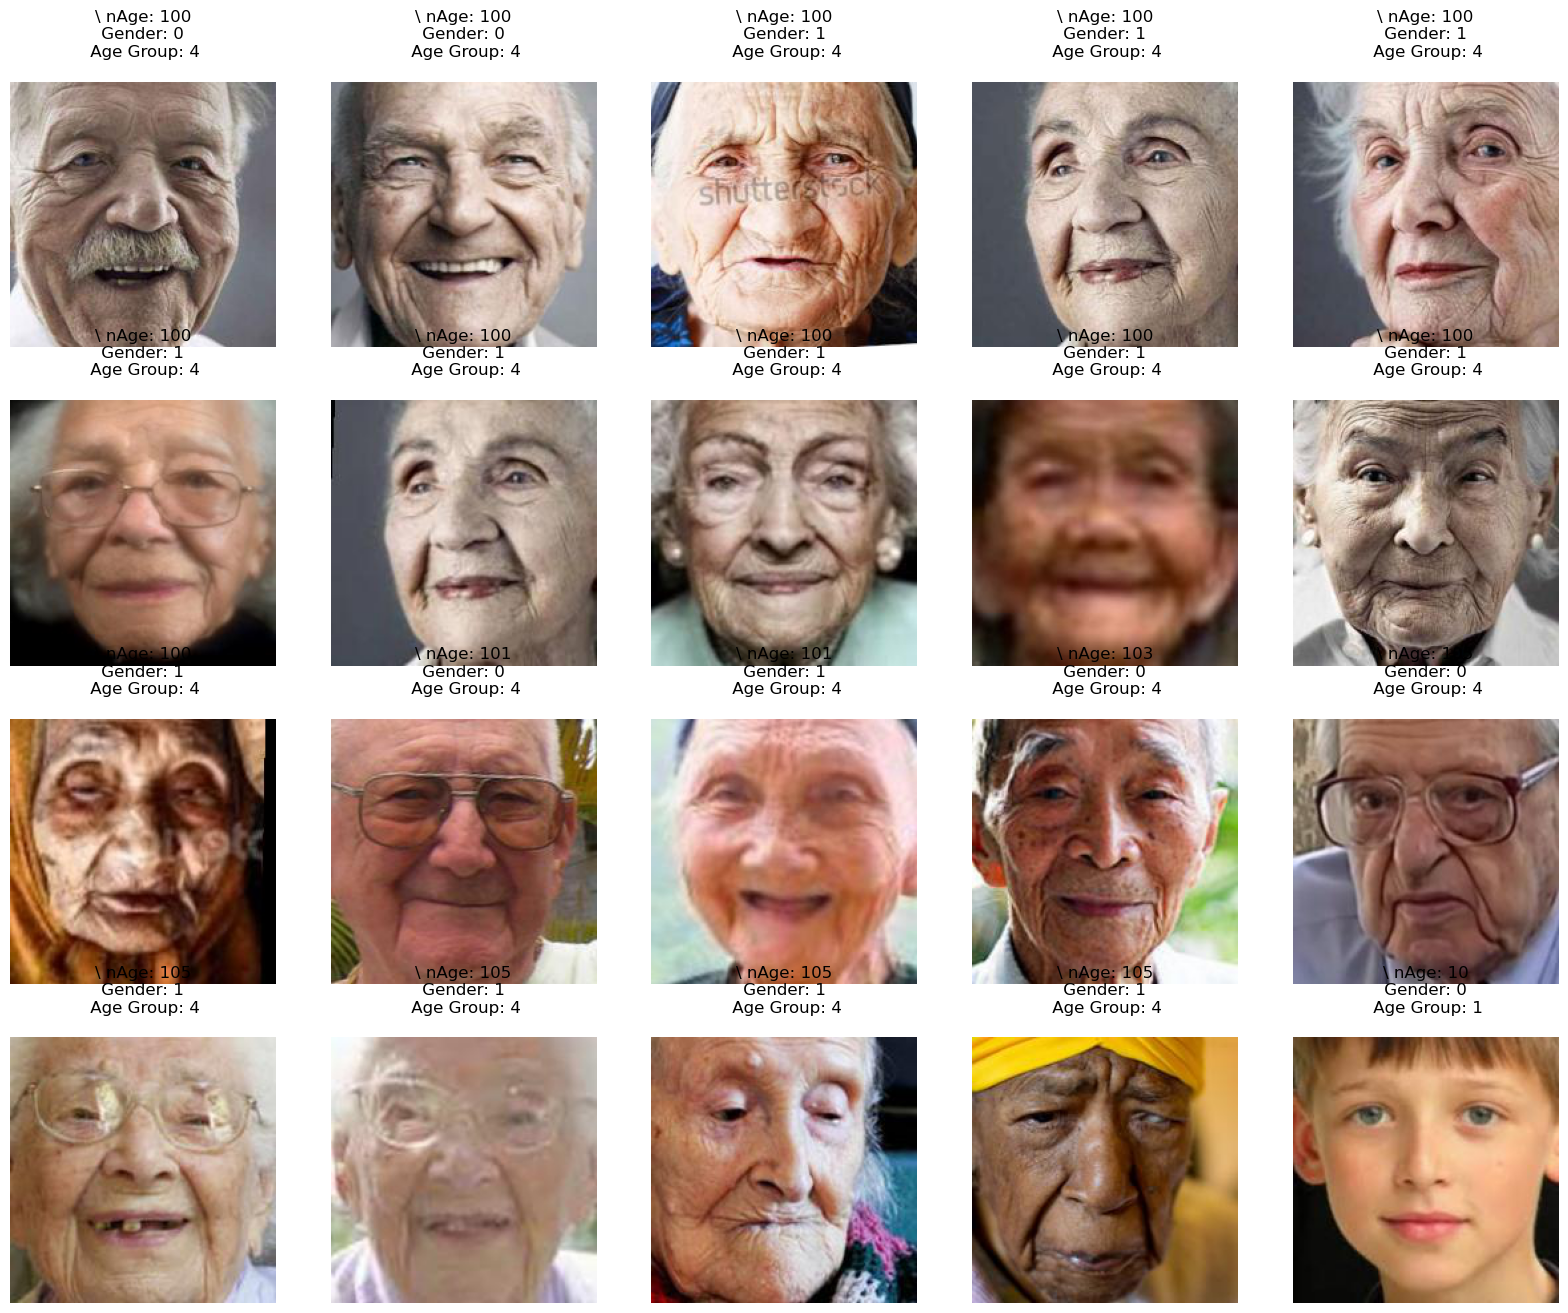

In [68]:
# to display grid of images
plt.figure(figsize=(20, 20))
files = data.iloc[0:20]

for index, row in files.iterrows():
    file, age, gender, age_group = row  # Unpack values from the row
    plt.subplot(5, 5, index+1)
    img = Image.open(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"\ nAge: {age}\n Gender: {gender} \n Age Group: {age_group}\n")
    plt.axis('off')

plt.show()

In [21]:
# here i have converted the string data to numerice data because when i am feeding data to model it is not accepting
#different kinds of data (strings)

#replacing the data with +ve numbers this is just for my convience only
data['age_groups'] = data['age_groups'].replace({
    'Toddlers/Preschoolers': 0,
    'Children': 1,
    'Young Adults': 2,
    'Middle Age': 3,
    'Seniors': 4
})


In [22]:
data

images_path  age  gender  \
0      C:/Users/raghu/Desktop/Final sem project/data ...  100       0   
1      C:/Users/raghu/Desktop/Final sem project/data ...  100       0   
2      C:/Users/raghu/Desktop/Final sem project/data ...  100       1   
3      C:/Users/raghu/Desktop/Final sem project/data ...  100       1   
4      C:/Users/raghu/Desktop/Final sem project/data ...  100       1   
...                                                  ...  ...     ...   
23703  C:/Users/raghu/Desktop/Final sem project/data ...    9       1   
23704  C:/Users/raghu/Desktop/Final sem project/data ...    9       1   
23705  C:/Users/raghu/Desktop/Final sem project/data ...    9       1   
23706  C:/Users/raghu/Desktop/Final sem project/data ...    9       1   
23707  C:/Users/raghu/Desktop/Final sem project/data ...    9       1   

      age_groups  
0              4  
1              4  
2              4  
3              4  
4              4  
...          ...  
23703          1  
23704          1  
23705          1  
23706          1  
23707          1  

[23708 rows x 4 columns]

In [23]:
#installing the tensor flow 

!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [24]:
#required modlues for working with neural networks

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input


In [25]:
#feature extraction function  will be used globally..

def extract_features(images_path):
    features = []
    for image in tqdm(images_path):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [57]:
pip install --upgrade tensorflow keras


Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/8d/44/c604ecc5c9993b6574a681f2f505e980725871a89cfd9e48597b12ccb506/keras-3.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for h5py>=3.10.0

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\raghu\\AppData\\Roaming\\Python\\Python311\\site-packages\\~0_dtypes\\_custom_floats.cp311-win_amd64.pyd'
Check the permissions.



In [26]:
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.utils import to_categorical


In [27]:
print(frequency_table)

          Age Categories  Count
0  Toddlers/Preschoolers   2167
1               Children   1908
2           Young Adults  12399
3             Middle Age   5226
4                Seniors   2008


In [28]:
# Calculate the total count for each category
category_counts = data['age_groups'].value_counts().sort_index()
#print(category_counts)

# Calculate X% of the total count for each category
#x is can be changed according to our requirments

twenty_percent_counts = (category_counts * 0.8).astype(int)

# Display the X% counts for each category
print(twenty_percent_counts)


age_groups
0    1733
1    1526
2    9919
3    4180
4    1606
Name: count, dtype: int32


In [29]:
# Define the minimum count
min_count = twenty_percent_counts.min()

# Extracting exact number of samples from each category using base vale (min vale)
sampled_data = data.groupby('age_groups', group_keys=False).apply(lambda x: x.sample(min_count))

# sampled_data contains exactly min_count samples from each category
print(sampled_data.count())

images_path    7630
age            7630
gender         7630
age_groups     7630
dtype: int64


In [30]:
# The remaining data will be used as a separate testing data set.

remaining_data = data[~data.index.isin(sampled_data.index)]

In [31]:
#size of the data for the leftover data
size = remaining_data.shape
print(size)

(16078, 4)


In [32]:
#extracting the features for only for the balanced data only.
sample_X = extract_features(sampled_data['images_path'])

  0%|          | 0/7630 [00:00<?, ?it/s]

C:\Users\raghu\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
C:\Users\raghu\AppData\Local\Temp\ipykernel_38484\4055392408.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)


In [33]:
#Normilize the data .. this for training data only...
sample_X = sample_X/255.0

In [34]:
#assiging the data..
y_gender = np.array(sampled_data['gender'])
y_age = np.array(sampled_data['age'])
y_age_groups = np.array(sampled_data['age_groups'])

In [35]:
# Split the data into X% training and Y% testing
X_train, X_test, y_gender_train, y_gender_test, y_age_train, y_age_test, y_age_groups_train, y_age_groups_test = train_test_split(
    sample_X, sampled_data['gender'], sampled_data['age'], sampled_data['age_groups'], test_size=0.2, random_state=42)


In [36]:
input_shape = (128, 128, 1)

In [37]:
# Model definition
inputs = Input(shape=input_shape)

# Convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)
conv_5 = Conv2D(512, kernel_size=(3, 3), activation='relu')(maxp_4)
maxp_5 = MaxPooling2D(pool_size=(2, 2))(conv_5)

In [38]:
#flatten the network
#converting 2D or 3D data into 1D

flatten = Flatten()(maxp_5)
#print(flatten)

# Fully connected layers
dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)



In [39]:
# Classification output for gender
Gender_result = Dense(1, activation='sigmoid', name='Gender_result')(dropout_1)

# Classification output for age groups
num_age_groups = 5  # we have 5 categories of data
Age_groups_results = Dense(num_age_groups, activation='softmax', name='Age_groups_results')(flatten)

y_age_groups_train_onehot = to_categorical(y_age_groups_train, num_classes=num_age_groups)

# Regression output for age
Age_result = Dense(1, activation='linear', name='Age_result')(dropout_2)

model = Model(inputs=[inputs], outputs=[Gender_result, Age_result, Age_groups_results])

# binary_crossentropy for gender,
#mae for age, 
#and categorical_crossentropy for age groups

model.compile(loss=['binary_crossentropy', 'mae', 'categorical_crossentropy'], optimizer='adam', metrics=['accuracy'])

# Training the model and storing the information for further insides.
history = model.fit(X_train, [y_gender_train, y_age_train, y_age_groups_train_onehot], epochs=35, batch_size=32, validation_split=0.2)



Epoch 1/35


153/153 [==============================] - 33s 190ms/step - loss: 26.8848 - Gender_result_loss: 0.7162 - Age_result_loss: 24.5094 - Age_groups_results_loss: 1.6591 - Gender_result_accuracy: 0.5153 - Age_result_accuracy: 0.1016 - Age_groups_results_accuracy: 0.1964 - val_loss: 24.0724 - val_Gender_result_loss: 0.6871 - val_Age_result_loss: 21.7460 - val_Age_groups_results_loss: 1.6393 - val_Gender_result_accuracy: 0.5291 - val_Age_result_accuracy: 0.1032 - val_Age_groups_results_accuracy: 0.2129
Epoch 2/35
153/153 [==============================] - 28s 182ms/step - loss: 22.7341 - Gender_result_loss: 0.6896 - Age_result_loss: 20.5305 - Age_groups_results_loss: 1.5140 - Gender_result_accuracy: 0.5437 - Age_result_accuracy: 0.0983 - Age_groups_results_accuracy: 0.3244 - val_loss: 23.5950 - val_Gender_result_loss: 0.6442 - val_Age_result_loss: 21.5021 - val_Age_groups_results_loss: 1.4487 - val_Gender_result_accuracy: 0.6052 - val_Age_result_accuracy: 0.1032 - val_Age_groups_

Epoch 16/35
153/153 [==============================] - 34s 224ms/step - loss: 7.5289 - Gender_result_loss: 0.4675 - Age_result_loss: 6.5406 - Age_groups_results_loss: 0.5207 - Gender_result_accuracy: 0.7612 - Age_result_accuracy: 0.1016 - Age_groups_results_accuracy: 0.7854 - val_loss: 9.7729 - val_Gender_result_loss: 0.4650 - val_Age_result_loss: 8.5251 - val_Age_groups_results_loss: 0.7828 - val_Gender_result_accuracy: 0.7666 - val_Age_result_accuracy: 0.1032 - val_Age_groups_results_accuracy: 0.6781
Epoch 17/35
153/153 [==============================] - 35s 228ms/step - loss: 7.2683 - Gender_result_loss: 0.4620 - Age_result_loss: 6.3093 - Age_groups_results_loss: 0.4970 - Gender_result_accuracy: 0.7688 - Age_result_accuracy: 0.1020 - Age_groups_results_accuracy: 0.7973 - val_loss: 9.6976 - val_Gender_result_loss: 0.4559 - val_Age_result_loss: 8.4576 - val_Age_groups_results_loss: 0.7841 - val_Gender_result_accuracy: 0.7748 - val_Age_result_accuracy: 0.1032 - val_Age_groups_results_a

153/153 [==============================] - 36s 237ms/step - loss: 4.5917 - Gender_result_loss: 0.3127 - Age_result_loss: 4.0314 - Age_groups_results_loss: 0.2475 - Gender_result_accuracy: 0.8446 - Age_result_accuracy: 0.1028 - Age_groups_results_accuracy: 0.9126 - val_loss: 9.5050 - val_Gender_result_loss: 0.4405 - val_Age_result_loss: 8.2195 - val_Age_groups_results_loss: 0.8451 - val_Gender_result_accuracy: 0.7928 - val_Age_result_accuracy: 0.1032 - val_Age_groups_results_accuracy: 0.7027
Epoch 33/35
153/153 [==============================] - 35s 231ms/step - loss: 4.5111 - Gender_result_loss: 0.3024 - Age_result_loss: 3.9770 - Age_groups_results_loss: 0.2316 - Gender_result_accuracy: 0.8599 - Age_result_accuracy: 0.1026 - Age_groups_results_accuracy: 0.9205 - val_loss: 9.6367 - val_Gender_result_loss: 0.4310 - val_Age_result_loss: 8.3656 - val_Age_groups_results_loss: 0.8401 - val_Gender_result_accuracy: 0.7961 - val_Age_result_accuracy: 0.1032 - val_Age_groups_results_accuracy: 0.6

In [40]:
# Extract losses for each task
gender_loss = history.history['Gender_result_loss']
age_loss = history.history['Age_result_loss']
age_groups_loss = history.history['Age_groups_results_loss']

# Print the last loss value for each task
print("Gender Loss:", gender_loss[-1])
print("Age Loss:", age_loss[-1])
print("Age Groups Loss:", age_groups_loss[-1])

#accuracy of while learning..
gender = history.history['Gender_result_accuracy']
Age = history.history['Age_result_accuracy']
AgeGroups = history.history['Age_groups_results_accuracy']

print("Gender Accuracy:", gender[-1])
print("Age:", Age[-1])
print("Age Groups:", AgeGroups[-1])

Gender Loss: 0.276969850063324
Age Loss: 3.9267349243164062
Age Groups Loss: 0.2127958983182907
Gender Accuracy: 0.8660659193992615
Age: 0.10280565172433853
Age Groups: 0.9281179308891296


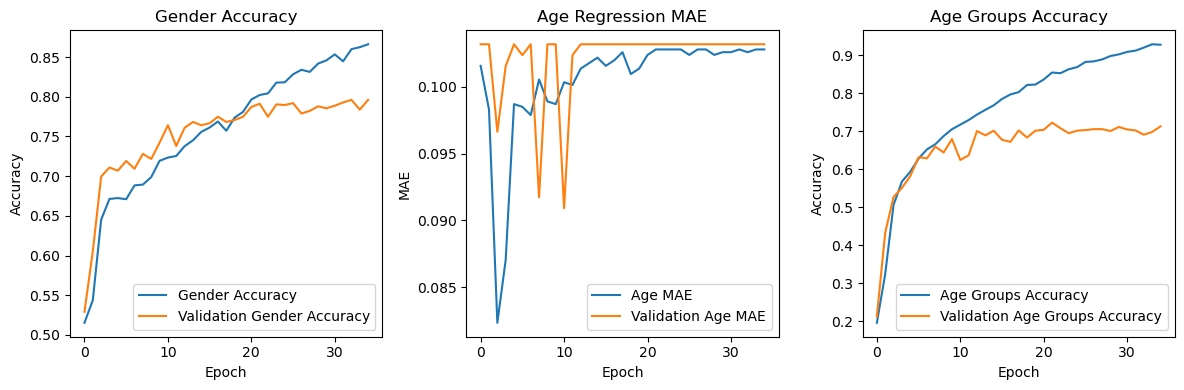

In [41]:

# Plot training history for accuracy
plt.figure(figsize=(12, 4))

# Plot Gender accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['Gender_result_accuracy'], label='Gender Accuracy')
plt.plot(history.history['val_Gender_result_accuracy'], label='Validation Gender Accuracy')
plt.title('Gender Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Age regression Mean Absolute Error (MAE)
plt.subplot(1, 3, 2)
plt.plot(history.history['Age_result_accuracy'], label='Age MAE')
plt.plot(history.history['val_Age_result_accuracy'], label='Validation Age MAE')
plt.title('Age Regression MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

# Plot Age groups accuracy
plt.subplot(1, 3, 3)
plt.plot(history.history['Age_groups_results_accuracy'], label='Age Groups Accuracy')
plt.plot(history.history['val_Age_groups_results_accuracy'], label='Validation Age Groups Accuracy')
plt.title('Age Groups Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, mean_absolute_error

# Passing the testing data to trained model for predections
y_gender_pred, y_age_result_pred, y_age_groups_pred = model.predict(X_test)

# Gender evaluation
gender_accuracy = accuracy_score(y_gender_test, np.round(y_gender_pred))
gender_f1 = f1_score(y_gender_test, np.round(y_gender_pred))
gender_report = classification_report(y_gender_test, np.round(y_gender_pred))

print("Gender Evaluation:")
print("Accuracy:", gender_accuracy)
print("F1 Score:", gender_f1)
print("Classification Report:")
print(gender_report)

# Age evaluation
age_mae = mean_absolute_error(y_age_test, y_age_result_pred)
print("\nAge Evaluation:")
print("Mean Absolute Error:", age_mae)

# Age groups evaluation
age_groups_accuracy = accuracy_score(y_age_groups_test, np.argmax(y_age_groups_pred, axis=1))
age_groups_f1 = f1_score(y_age_groups_test, np.argmax(y_age_groups_pred, axis=1), average='weighted')
age_groups_report = classification_report(y_age_groups_test, np.argmax(y_age_groups_pred, axis=1))

print("\nAge Groups Evaluation:")
print("Accuracy:", age_groups_accuracy)
print("F1 Score:", age_groups_f1)
print("Classification Report:")
print(age_groups_report)


48/48 [==============================] - 3s 60ms/step
Gender Evaluation:
Accuracy: 0.7739187418086501
F1 Score: 0.7540983606557378
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       828
           1       0.75      0.76      0.75       698

    accuracy                           0.77      1526
   macro avg       0.77      0.77      0.77      1526
weighted avg       0.77      0.77      0.77      1526


Age Evaluation:
Mean Absolute Error: 7.762779338058294

Age Groups Evaluation:
Accuracy: 0.7070773263433814
F1 Score: 0.7104855420042386
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       327
           1       0.75      0.71      0.73       316
           2       0.61      0.76      0.67       289
           3       0.52      0.52      0.52       291
           4       0.75      0.73      0.74       303

    accuracy                    

48/48 [==============================] - 3s 61ms/step


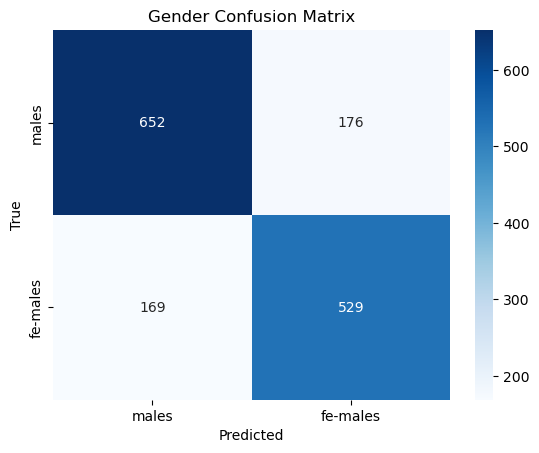

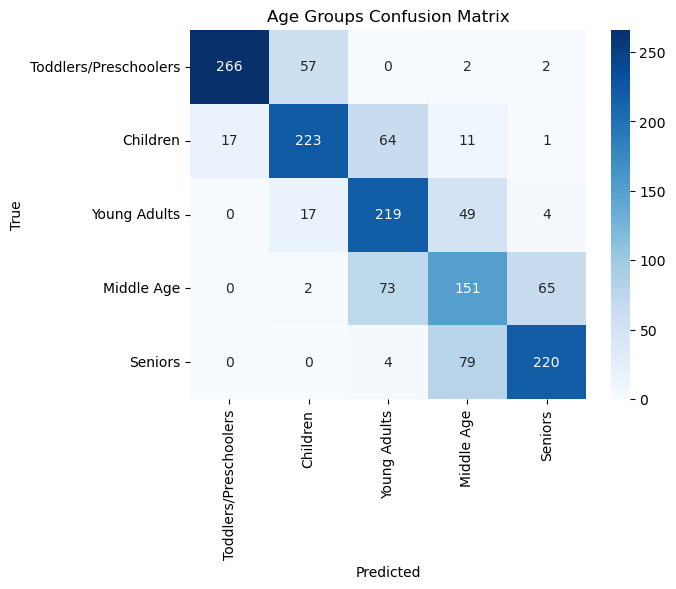

In [43]:
from sklearn.metrics import confusion_matrix



# Now, you can make predictions
y_gender_pred, y_age_result_pred, y_age_groups_pred_onehot = model.predict(X_test)

# Convert one-hot encoded age groups predictions to categorical predictions
y_age_groups_pred = np.argmax(y_age_groups_pred_onehot, axis=1)

# Gender confusion matrix
gender_conf_matrix = confusion_matrix(y_gender_test, np.round(y_gender_pred))
sns.heatmap(gender_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=G_lables, yticklabels=G_lables)
plt.title('Gender Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Age Groups confusion matrix
age_groups_conf_matrix = confusion_matrix(y_age_groups_test, y_age_groups_pred)
sns.heatmap(age_groups_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Age Groups Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [44]:
# predictions are probabilities and need to be rounded to 0 or 1
y_gender_pred_binary = np.round(y_gender_pred)

#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_gender_test, y_gender_pred_binary).ravel()

# Calculation for  sensitivity (also known as "recall" or "true positive rate")
sensitivity = tp / (tp + fn)

# Calculation specificity (also known as "true negative rate")
specificity = tn / (tn + fp)

print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)


Sensitivity (True Positive Rate): 0.7578796561604585
Specificity (True Negative Rate): 0.7874396135265701


In [56]:

#confusion matrix for age groups
age_groups_cm = confusion_matrix(y_age_groups_test, y_age_groups_pred)

# Calculating sensitivity (True Positive Rate) for each class
sensitivity_per_class = np.diag(age_groups_cm) / np.sum(age_groups_cm, axis=1)

# Calculating specificity (True Negative Rate) for each class
specificity_per_class = []
for i in range(len(age_groups_cm)):
    TN = np.sum(age_groups_cm) - (np.sum(age_groups_cm[i, :]) + np.sum(age_groups_cm[:, i]) - age_groups_cm[i, i])
    FP = np.sum(age_groups_cm[:, i]) - age_groups_cm[i, i]
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    specificity_per_class.append(specificity)

print("Sensitivity by class:", sensitivity_per_class)
print("Specificity by class:", specificity_per_class)


Sensitivity by class: [0.81345566 0.7056962  0.75778547 0.51890034 0.72607261]
Specificity by class: [0.9858215179316097, 0.9371900826446281, 0.8860145513338723, 0.8858299595141701, 0.9411283728536386]


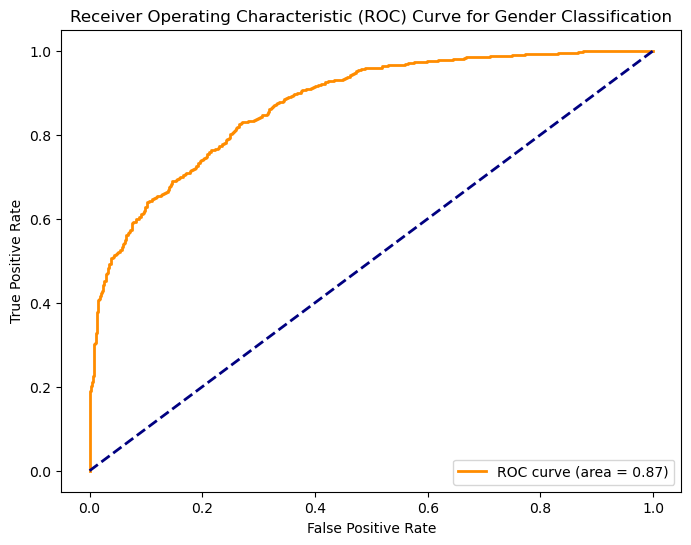

In [45]:
from sklearn.metrics import roc_curve, auc


# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_gender_test, y_gender_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gender Classification')
plt.legend(loc='lower right')
plt.show()


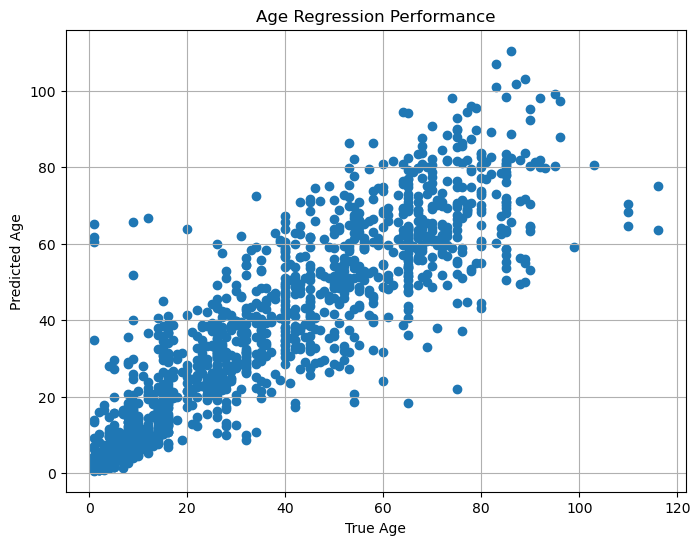

In [69]:

# Age regression evaluation
plt.figure(figsize=(8, 6))
plt.scatter(y_age_test, y_age_result_pred)
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('Age Regression Performance')
plt.grid(True)
plt.show()


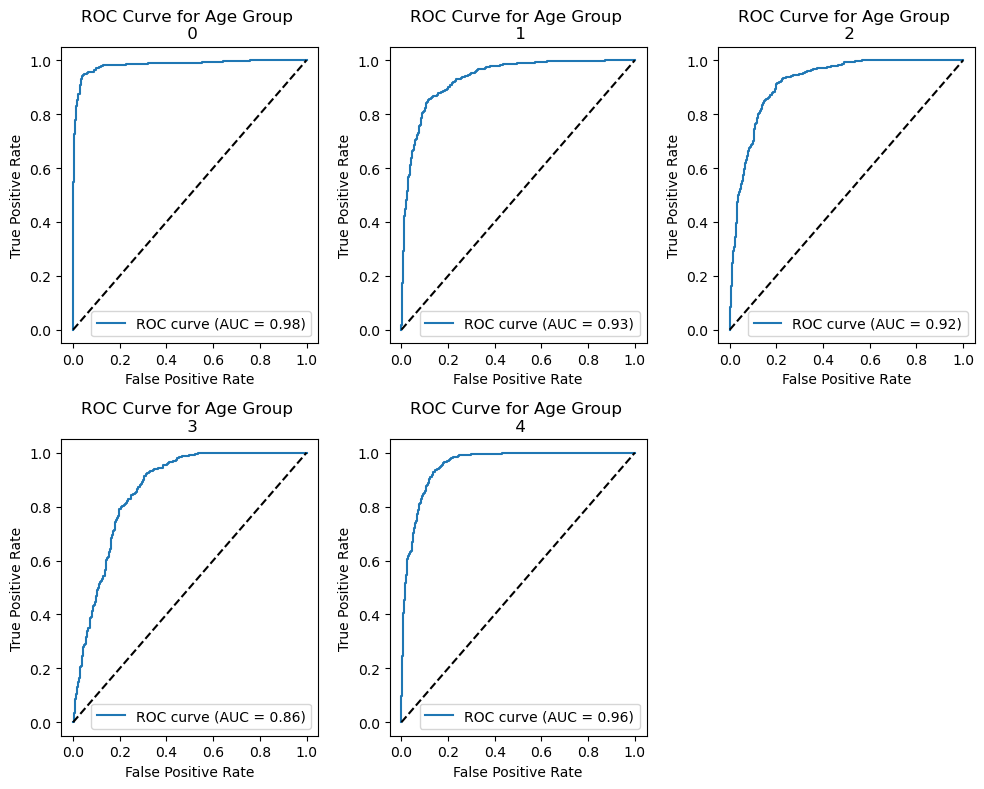

In [70]:
# Age groups classification evaluation
plt.figure(figsize=(10, 8))
for i in range(num_age_groups):
    plt.subplot(2, 3, i+1)
    fpr, tpr, _ = roc_curve(y_age_groups_test == i, y_age_groups_pred_onehot[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Age Group \n {}'.format(labels[i]))
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


In [48]:
#testing the model using remaining data...

# Extract features for the remaining test data
X_test_remaining = extract_features(remaining_data['images_path'])

 # Normalize the data
X_test_remaining = X_test_remaining / 255.0 


  0%|          | 0/16078 [00:00<?, ?it/s]

C:\Users\raghu\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
C:\Users\raghu\AppData\Local\Temp\ipykernel_38484\4055392408.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)


In [49]:
#shape of the reamaing data
shape = remaining_data.shape
print(shape)

(16078, 4)


In [50]:
# Passing the remaining data to the model to get predictions
y_gender_pred_remaining, y_age_result_pred_remaining, y_age_groups_pred_remaining = model.predict(X_test_remaining)

# Gender evaluation on remaining data
gender_accuracy_remaining = accuracy_score(remaining_data['gender'], np.round(y_gender_pred_remaining))
gender_f1_remaining = f1_score(remaining_data['gender'], np.round(y_gender_pred_remaining))
gender_report_remaining = classification_report(remaining_data['gender'], np.round(y_gender_pred_remaining))

print("Gender Evaluation on Remaining Data:")
print("Accuracy:", gender_accuracy_remaining)
print("F1 Score:", gender_f1_remaining)
print("Classification Report:")
print(gender_report_remaining)

# Age evaluation on remaining data
age_mae_remaining = mean_absolute_error(remaining_data['age'], y_age_result_pred_remaining)
print("\nAge Evaluation on Remaining Data:")
print("Mean Absolute Error:", age_mae_remaining)

# Age groups evaluation on remaining data
age_groups_accuracy_remaining = accuracy_score(remaining_data['age_groups'], np.argmax(y_age_groups_pred_remaining, axis=1))
age_groups_f1_remaining = f1_score(remaining_data['age_groups'], np.argmax(y_age_groups_pred_remaining, axis=1), average='weighted')
age_groups_report_remaining = classification_report(remaining_data['age_groups'], np.argmax(y_age_groups_pred_remaining, axis=1))

print("\nAge Groups Evaluation on Remaining Data:")
print("Accuracy:", age_groups_accuracy_remaining)
print("F1 Score:", age_groups_f1_remaining)
print("Classification Report:")
print(age_groups_report_remaining)

503/503 [==============================] - 30s 60ms/step
Gender Evaluation on Remaining Data:
Accuracy: 0.8799601940539868
F1 Score: 0.8736745647336038
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      8293
           1       0.89      0.86      0.87      7785

    accuracy                           0.88     16078
   macro avg       0.88      0.88      0.88     16078
weighted avg       0.88      0.88      0.88     16078


Age Evaluation on Remaining Data:
Mean Absolute Error: 8.775936115472408

Age Groups Evaluation on Remaining Data:
Accuracy: 0.6988431396939918
F1 Score: 0.723329394010303
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       641
           1       0.25      0.71      0.37       382
           2       0.89      0.74      0.81     10873
           3       0.49      0.55      0.52      3700
           4       0.26      0.

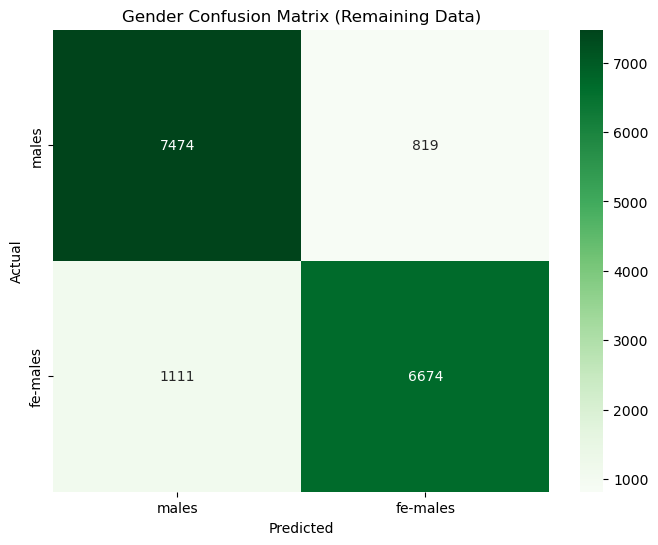

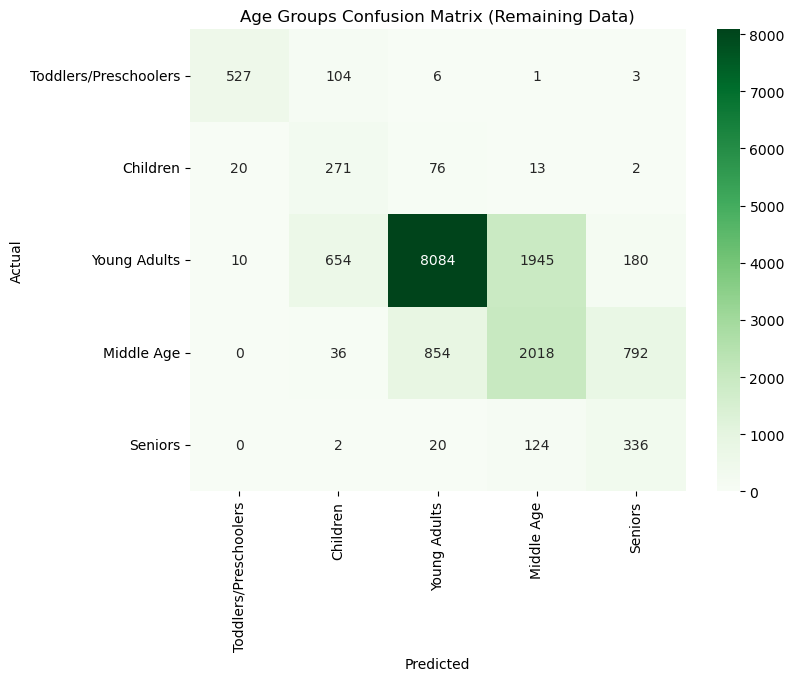

In [51]:
#confusion matrix for gender classification
gender_cm = confusion_matrix(remaining_data['gender'], np.round(y_gender_pred_remaining))

# Ploting confusion matrix for gender classification
plt.figure(figsize=(8, 6))
sns.heatmap(gender_cm, annot=True, fmt='d', cmap='Greens', xticklabels=G_lables, yticklabels=G_lables)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gender Confusion Matrix (Remaining Data)')
plt.show()

#confusion matrix for age groups classification
age_groups_cm = confusion_matrix(remaining_data['age_groups'], np.argmax(y_age_groups_pred_remaining, axis=1))

# Ploting confusion matrix for age groups classification
plt.figure(figsize=(8, 6))
sns.heatmap(age_groups_cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Age Groups Confusion Matrix (Remaining Data)')
plt.show()


In [52]:
# Gender classification
gender_cm = confusion_matrix(remaining_data['gender'], np.round(y_gender_pred_remaining))
tn, fp, fn, tp = gender_cm.ravel()
gender_sensitivity = tp / (tp + fn)
gender_specificity = tn / (tn + fp)


print("Gender Classification Sensitivity:", gender_sensitivity)
print("Gender Classification Specificity:", gender_specificity)

# Age groups classification
age_groups_cm = confusion_matrix(remaining_data['age_groups'], np.argmax(y_age_groups_pred_remaining, axis=1))

# Since this is potentially a multi-class classification, we need to calculate sensitivity and specificity for each class
sensitivity_per_class = np.diag(age_groups_cm) / np.sum(age_groups_cm, axis=1)
specificity_per_class = np.diag(age_groups_cm) / np.sum(age_groups_cm, axis=0)

print("Age Groups Classification Sensitivity by class:", sensitivity_per_class)
print("Age Groups Classification Specificity by class:", specificity_per_class)

Gender Classification Sensitivity: 0.8572896596017984
Gender Classification Specificity: 0.9012420113348607
Age Groups Classification Sensitivity by class: [0.82215289 0.70942408 0.74349306 0.54540541 0.69709544]
Age Groups Classification Specificity by class: [0.94614004 0.25398313 0.89424779 0.4920751  0.25590251]


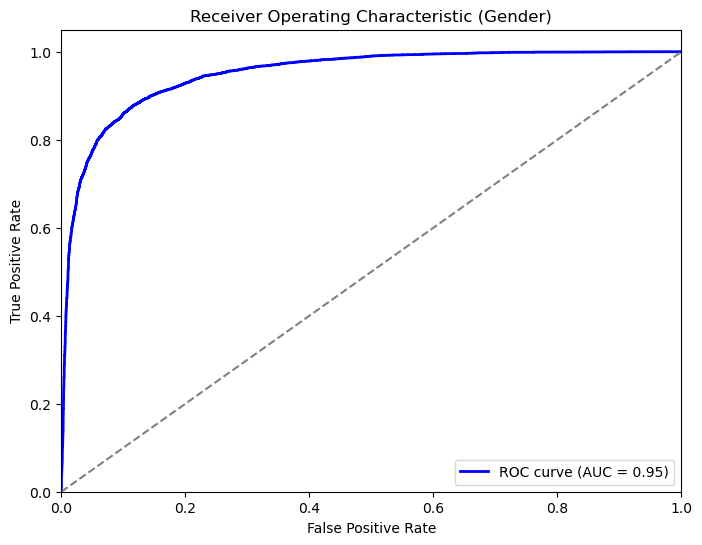

In [71]:

# ROC curve for gender classification
fpr_gender, tpr_gender, _ = roc_curve(remaining_data['gender'], y_gender_pred_remaining)
roc_auc_gender = auc(fpr_gender, tpr_gender)

# Plot ROC curve for gender classification
plt.figure(figsize=(8, 6))
plt.plot(fpr_gender, tpr_gender, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_gender)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Gender)')
plt.legend(loc='lower right')
plt.show()


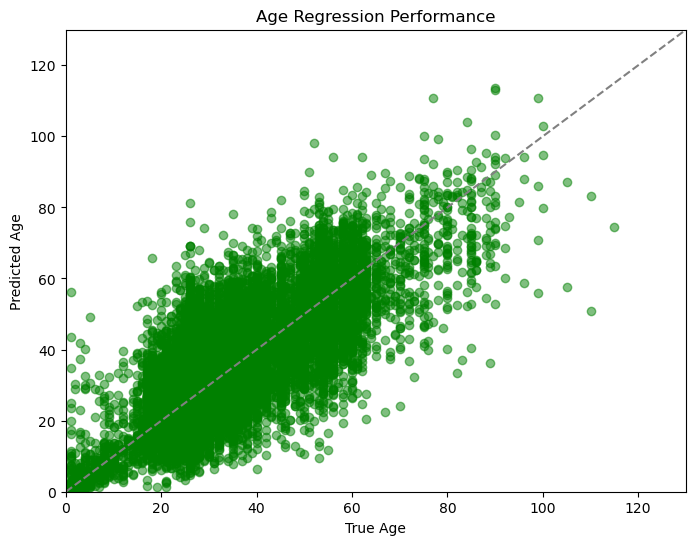

In [50]:
#scatter plot for age regression
plt.figure(figsize=(8, 6))
plt.scatter(remaining_data['age'], y_age_result_pred_remaining, color='green', alpha=0.5)
plt.plot([0, 200], [0, 200], color='gray', linestyle='--')  
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('Age Regression Performance')
plt.xlim([0, 130])
plt.ylim([0, 130])
plt.show()


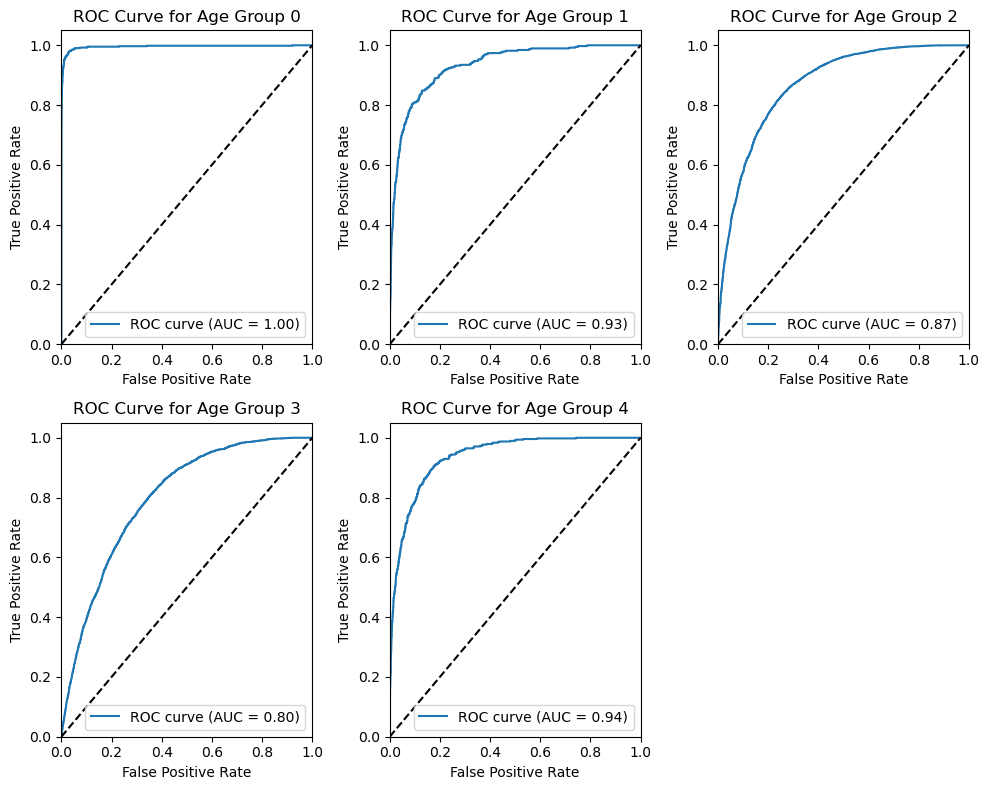

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


num_age_groups = len(np.unique(remaining_data['age_groups']))  
labels = np.unique(remaining_data['age_groups']) 

# Binarize the output labels for all age groups
y_true = label_binarize(remaining_data['age_groups'], classes=labels)
y_score = y_age_groups_pred_remaining

# Setting up the figure for subplots
plt.figure(figsize=(10, 8))

for i in range(num_age_groups):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Create a subplot for each age group
    plt.subplot(2, 3, i+1)  
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Age Group {labels[i]}')
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
pip install opencv-python

In [ ]:
import cv2
import numpy as np

# Define age groups
age_groups = ['Toddlers/Preschoolers', 'Children', 'Young Adults', 'Middle Age', 'Seniors']

# Load the face detection cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Capture images from the webcam
cap = cv2.VideoCapture(0)

while True:
    # Retrieve frame from the webcam
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Failed to capture frame")
        break
    
    # Convert frame to grayscale for face detection
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(50, 50))
    
    # Draw green boxes around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Preprocess the frame
    resized_frame = cv2.resize(frame, (128, 128))
    grayscale_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
    normalized_frame = grayscale_frame / 255.0
    input_frame = np.expand_dims(normalized_frame, axis=-1)
    input_frame = np.expand_dims(input_frame, axis=0)  # Add batch dimension
    
    # Pass the frame through the model
    y_gender_pred, y_age_result_pred, y_age_groups_pred = model.predict(input_frame)
    
    # Extract predictions
    gender_prediction = y_gender_pred[0]
    age_prediction = y_age_result_pred[0]
    age_group_prediction = np.argmax(y_age_groups_pred[0])
    
    # Postprocess predictions
    gender_label = 'Fe-Male' if gender_prediction >= 0.5 else 'male'
    age = int(age_prediction)
    age_group_label = age_groups[age_group_prediction]
    
    # Display predictions
    cv2.putText(frame, f'Gender: {gender_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    cv2.putText(frame, f'Age: {age}', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    cv2.putText(frame, f'Age Group: {age_group_label}', (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    
    cv2.imshow('Webcam', frame)
    
    # Exit the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()
